# Tahmin

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn import model_selection
import matplotlib.pyplot as plt

In [2]:
hit = pd.read_csv("Hitters.csv")

df = hit.copy()

df = df.dropna()

dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])

y = df["Salary"]

X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float64")

X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

C:\Users\Sefa3\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5691.3971730060875, tolerance: 3898.686956380658
  positive)
C:\Users\Sefa3\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6243.794457580894, tolerance: 3898.686956380658
  positive)
C:\Users\Sefa3\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10981.91397472471, tolerance: 3898.686956380658
  positive)
C:\Users\Sefa3\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

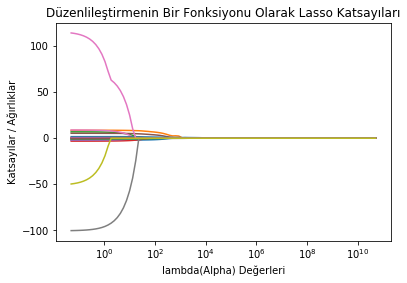

In [3]:
lambdalar = 10 ** np.linspace(10, -2, 100) * 5

lasso_model = Lasso()
katsayilar = []

for i in lambdalar:
    lasso_model.set_params(alpha = i)
    lasso_model.fit(X_train, y_train)
    katsayilar.append(lasso_model.coef_)
    
ax = plt.gca()
ax.plot(lambdalar, katsayilar)
ax.set_xscale("log")

plt.axis("tight")
plt.xlabel("lambda(Alpha) Değerleri")
plt.ylabel("Katsayılar / Ağırlıklar")
plt.title("Düzenlileştirmenin Bir Fonksiyonu Olarak Lasso Katsayıları");

In [4]:
lasso_model

Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

## eğitim seti için bulunan hata;

In [13]:
lasso_model.predict(X_train)

array([ 378.24555009,  781.72181162,  494.65256702,  116.63494831,
        425.08084478, 1003.98297497,  155.59854548,  362.0201954 ,
        487.4977061 ,  919.18156386, 1619.29045745,  817.26812936,
        922.92577353,  743.13008575,  651.17249672,  705.08968291,
       1135.03495476,   39.10666711,  212.11885202,  407.93814153,
        712.58179197, 1085.87714264,  475.72540792,  391.85173212,
         12.7337238 ,  774.81323108,  563.56499468,  180.49923467,
        336.54581991,  323.23053117,  207.06834209,  503.44562205,
        950.64673428,  298.05589366,  482.70416397,  422.73609423,
        427.03138195,  669.19972381,  297.62651746,  203.81851443,
        213.5040927 ,  318.53038545,  202.98986676,  132.68308885,
        225.20744117, 1091.51854628,  330.20320844,  529.59736394,
        340.91758231,  323.48390665,  538.83290418,  444.98553226,
        332.07431966,  451.440059  ,  654.87819369,  280.53981463,
        451.44037388,  703.77805192,  276.64381467, 1536.22138

In [14]:
y_pred_train = lasso_model.predict(X_train)

In [15]:
np.sqrt(mean_squared_error(y_train, y_pred_train))

289.36546365261916

In [16]:
r2_score(y_train, y_pred_train)

0.5769017266359919

## test seti için bulunan hata;

In [17]:
lasso_model.predict(X_test)

array([ 614.14982527,  702.24948346, 1005.35941383,  414.18636154,
        398.62194202,  344.72032181,  665.01871087,  451.53393778,
        914.68247641,  644.54335817,  691.51335015,  884.43781331,
        209.66949198,  446.22565101,  262.69967716,  499.02774876,
        805.35654662,   43.31063189, 1250.51123905,  316.15184775,
        422.75902054,  743.21089697,  572.90881204,  655.16514444,
        618.9693712 ,  200.49760677,  882.64104876,  253.95178573,
        430.45401488,   83.96658988,  143.45665588,  130.611807  ,
        363.66904646,  461.93229622,  273.41371728,  242.76457353,
       1324.6394014 ,  107.98893228,  135.65156387,  242.44090219,
         51.42164552,  297.64129368,  586.67087292,  398.73526763,
        763.62022274,  688.87585656,  343.92093223,  245.77587296,
        254.94522977,  662.72930214,  766.0147892 ,  313.59132753,
        765.79474854,  189.58319561,  284.14297318,  590.04290744,
        663.38765516,  803.12409197,  164.93677099, 1170.25024

In [18]:
y_pred_test = lasso_model.predict(X_test)

In [19]:
np.sqrt(mean_squared_error(y_test, y_pred_test))

356.79561756210836

In [20]:
r2_score(y_test, y_pred_test)

0.4119292481388006